In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
os.makedirs("figures", exist_ok=True)

exp_path = "일반국민의 개인정보 침해 경험.csv"
noresp_path = "개인정보 침해 경험자 중 대응도 하지 않은 비중.csv"

exp_raw = pd.read_csv(exp_path)
noresp_raw = pd.read_csv(noresp_path)

print(exp_raw)
print(noresp_raw)


                   구분  2017년  2018년  2019년  2020년  2021년
0            침해 경험 없음   28.3   35.0   44.0   49.4   55.7
1         침해 경험 있음-유출   21.0   20.7   21.8   28.0   24.8
2  침해 경험 있음-무단수집 및 이용   22.3   34.4   26.9   27.4   24.3
3     침해 경험 있음-과도한 수집   23.5    0.0    0.0    0.0    0.0
4         침해 경험 있음-도용    4.3    9.6    6.5   11.6   12.7
5    침해 경험 있음-권리행사 거부    0.0    0.0    0.0    3.1    2.6
6         침해 경험 있음-기타    0.6    0.2    0.7    0.7    0.9
                        구분  2017년  2018년  2019년  2020년  2021년
0                   무대응 비중   65.8   61.5   69.1   32.7   29.7
1  무대응 사유-별다른 효과가 없을 것 같아서    0.0   23.5   28.5   27.1   30.9
2     무대응 사유-절차가 번거롭고 귀찮아서    0.0   21.6   25.3   26.8   24.4
3          무대응 사유-피해가 경미해서    0.0   24.7   20.5   24.3   19.9
4   무대응 사유-구제 방법 및 절차를 몰라서    0.0   29.9   24.4   19.0   22.8
5                무대응 사유-기타    0.0    0.3    1.3    2.8    2.1


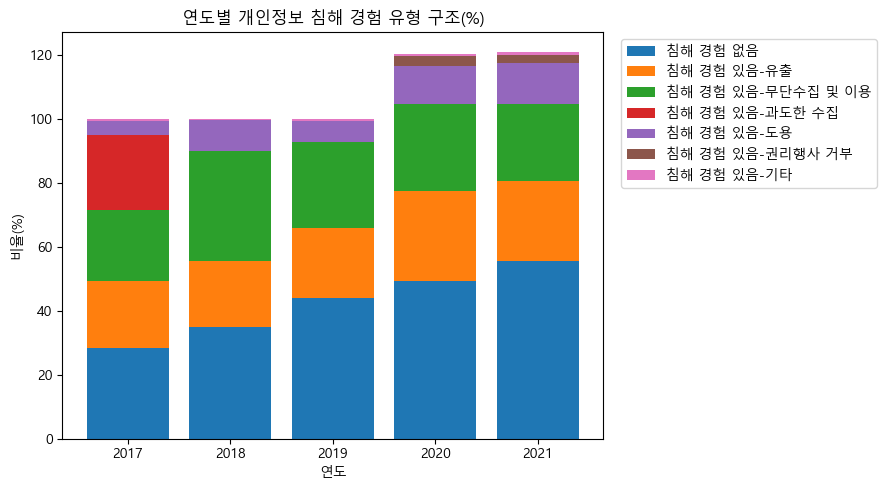

In [5]:
exp = exp_raw.copy()

exp_long = exp.melt(id_vars='구분', var_name='year', value_name='value')

exp_long['year_num'] = exp_long['year'].str.replace('년', '', regex=False).astype(int)


plt.figure(figsize=(9,5))
bottom = None
for label in exp_long['구분'].unique():
    sub = exp_long[exp_long['구분'] == label].sort_values('year_num')
    if bottom is None:
        plt.bar(sub['year_num'], sub['value'], label=label)
        bottom = sub['value'].values
    else:
        plt.bar(sub['year_num'], sub['value'], bottom=bottom, label=label)
        bottom = bottom + sub['value'].values

plt.title("연도별 개인정보 침해 경험 유형 구조(%)")
plt.xlabel("연도")
plt.ylabel("비율(%)")
plt.xticks(sorted(exp_long['year_num'].unique()))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig("figures/exp_type_structure_year.png", dpi=150)
plt.show()


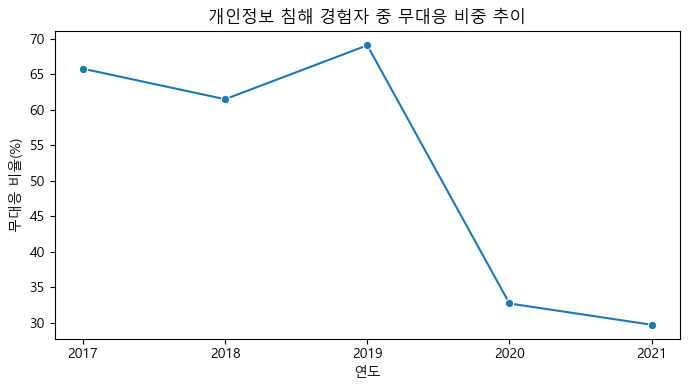

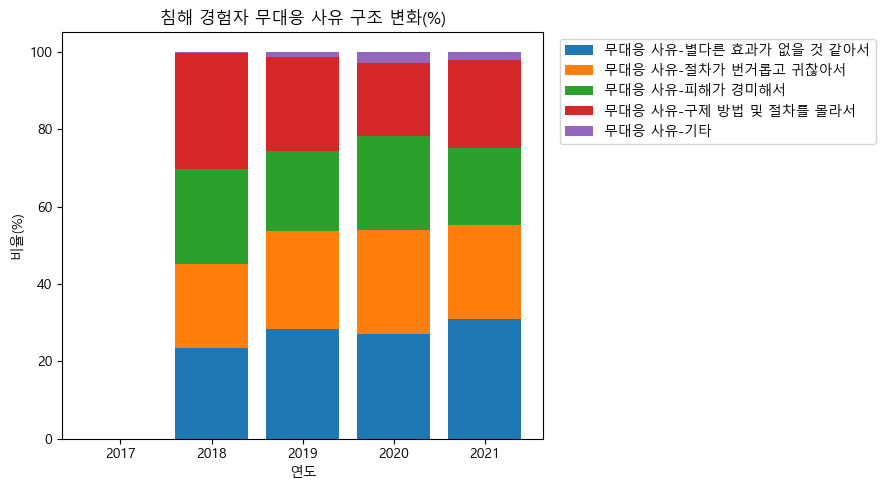

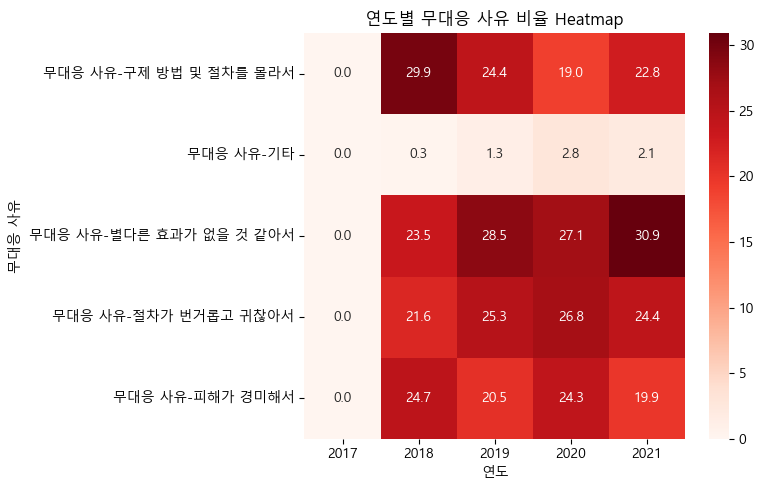

In [6]:
noresp = noresp_raw.copy()


noresp_total = noresp[noresp['구분'] == '무대응 비중']

noresp_total_long = noresp_total.melt(
    id_vars='구분', var_name='year', value_name='rate'
)
noresp_total_long['year_num'] = noresp_total_long['year'].str.replace('년', '', regex=False).astype(int)

plt.figure(figsize=(7,4))
sns.lineplot(
    data=noresp_total_long.sort_values('year_num'),
    x='year_num',
    y='rate',
    marker='o'
)
plt.title("개인정보 침해 경험자 중 무대응 비중 추이")
plt.xlabel("연도")
plt.ylabel("무대응 비율(%)")
plt.xticks(noresp_total_long['year_num'].unique())
plt.tight_layout()
plt.savefig("figures/no_response_total_trend.png", dpi=150)
plt.show()


reasons = noresp[noresp['구분'] != '무대응 비중'].copy()

reasons_long = reasons.melt(
    id_vars='구분', var_name='year', value_name='rate'
)
reasons_long['year_num'] = reasons_long['year'].str.replace('년', '', regex=False).astype(int)


plt.figure(figsize=(9,5))
bottom = None
for label in reasons_long['구분'].unique():
    sub = reasons_long[reasons_long['구분'] == label].sort_values('year_num')
    if bottom is None:
        plt.bar(sub['year_num'], sub['rate'], label=label)
        bottom = sub['rate'].values
    else:
        plt.bar(sub['year_num'], sub['rate'], bottom=bottom, label=label)
        bottom = bottom + sub['rate'].values

plt.title("침해 경험자 무대응 사유 구조 변화(%)")
plt.xlabel("연도")
plt.ylabel("비율(%)")
plt.xticks(sorted(reasons_long['year_num'].unique()))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig("figures/no_response_reason_structure_year.png", dpi=150)
plt.show()

pivot_reason = reasons_long.pivot(
    index='구분', columns='year_num', values='rate'
)

plt.figure(figsize=(8,5))
sns.heatmap(
    pivot_reason,
    annot=True,
    fmt=".1f",
    cmap="Reds"
)
plt.title("연도별 무대응 사유 비율 Heatmap")
plt.xlabel("연도")
plt.ylabel("무대응 사유")
plt.tight_layout()
plt.savefig("figures/no_response_reason_heatmap.png", dpi=150)
plt.show()


In [10]:
import pandas as pd

exp_raw = pd.read_csv("일반국민의 개인정보 침해 경험.csv")

exp_long = exp_raw.melt(id_vars='구분', var_name='year', value_name='value')
exp_long['year_num'] = exp_long['year'].str.replace('년', '', regex=False).astype(int)

leak = exp_long[exp_long['구분'] == '침해 경험 있음-유출'][['year_num', 'value']]
leak = leak.rename(columns={'value': 'leak_rate'})

theft = exp_long[exp_long['구분'] == '침해 경험 있음-도용'][['year_num', 'value']]
theft = theft.rename(columns={'value': 'theft_rate'})

exp_type = pd.merge(leak, theft, on='year_num', how='outer').sort_values('year_num')
exp_type.to_csv("exp_type_leak_theft_year.csv", index=False)  # trend_consult_corp에서 읽어오기용
exp_type


,year_num,leak_rate,theft_rate
0,2017,21.0,4.3
1,2018,20.7,9.6
2,2019,21.8,6.5
3,2020,28.0,11.6
4,2021,24.8,12.7
